## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Reading Data

In [2]:
heart = pd.read_csv("project1_logreg.csv")
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3811.000000,3811.000000,3715.000000,3811.000000,3785.000000,3763.000000,3811.000000,3811.000000,3811.000000,3765.000000,3811.000000,3811.000000,3792.000000,3810.000000,3454.000000,3811.000000
mean,0.424823,49.568092,1.975236,0.498557,8.985997,0.028966,0.005773,0.309368,0.024141,236.871182,132.258462,82.882052,25.811659,75.754856,81.667342,0.150879
std,0.494381,8.545495,1.018108,0.500064,11.831090,0.167734,0.075769,0.462294,0.153506,44.646827,21.914433,11.812975,4.064618,11.978420,22.087161,0.357978
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.087500,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.375000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,90.000000,28.090000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


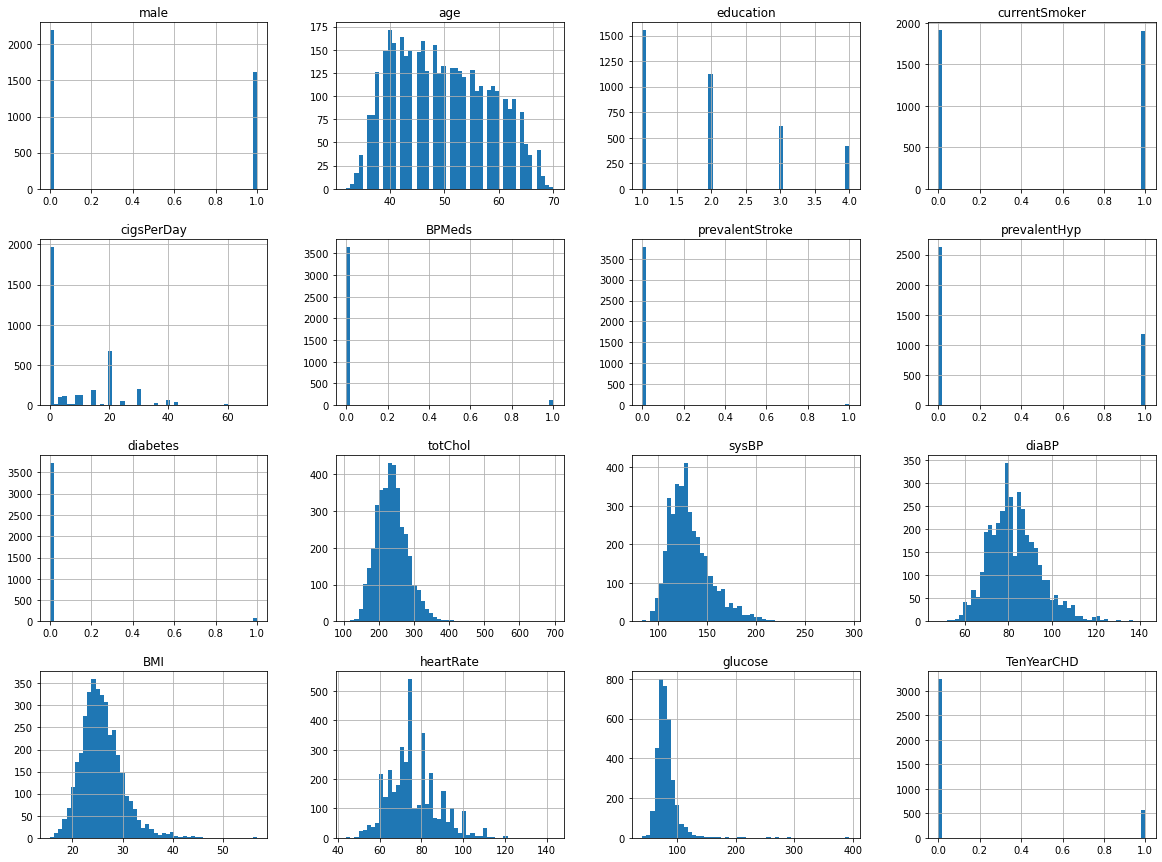

In [4]:
heart.hist(bins = 50, figsize = (20,15))
plt.show()

In [5]:
corr_matrix = heart.corr()
corr_matrix["TenYearCHD"].sort_values(ascending = False)

TenYearCHD         1.000000
sysBP              0.219525
age                0.218817
prevalentHyp       0.182569
diaBP              0.145256
glucose            0.128340
diabetes           0.096095
BMI                0.084676
male               0.084129
BPMeds             0.082846
totChol            0.076577
prevalentStroke    0.064647
cigsPerDay         0.060444
heartRate          0.021424
currentSmoker      0.021010
education         -0.054787
Name: TenYearCHD, dtype: float64

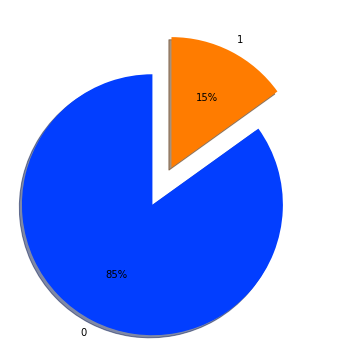

In [6]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(heart.TenYearCHD.value_counts(), colors = colors, labels = [0, 1],
explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

<AxesSubplot:>

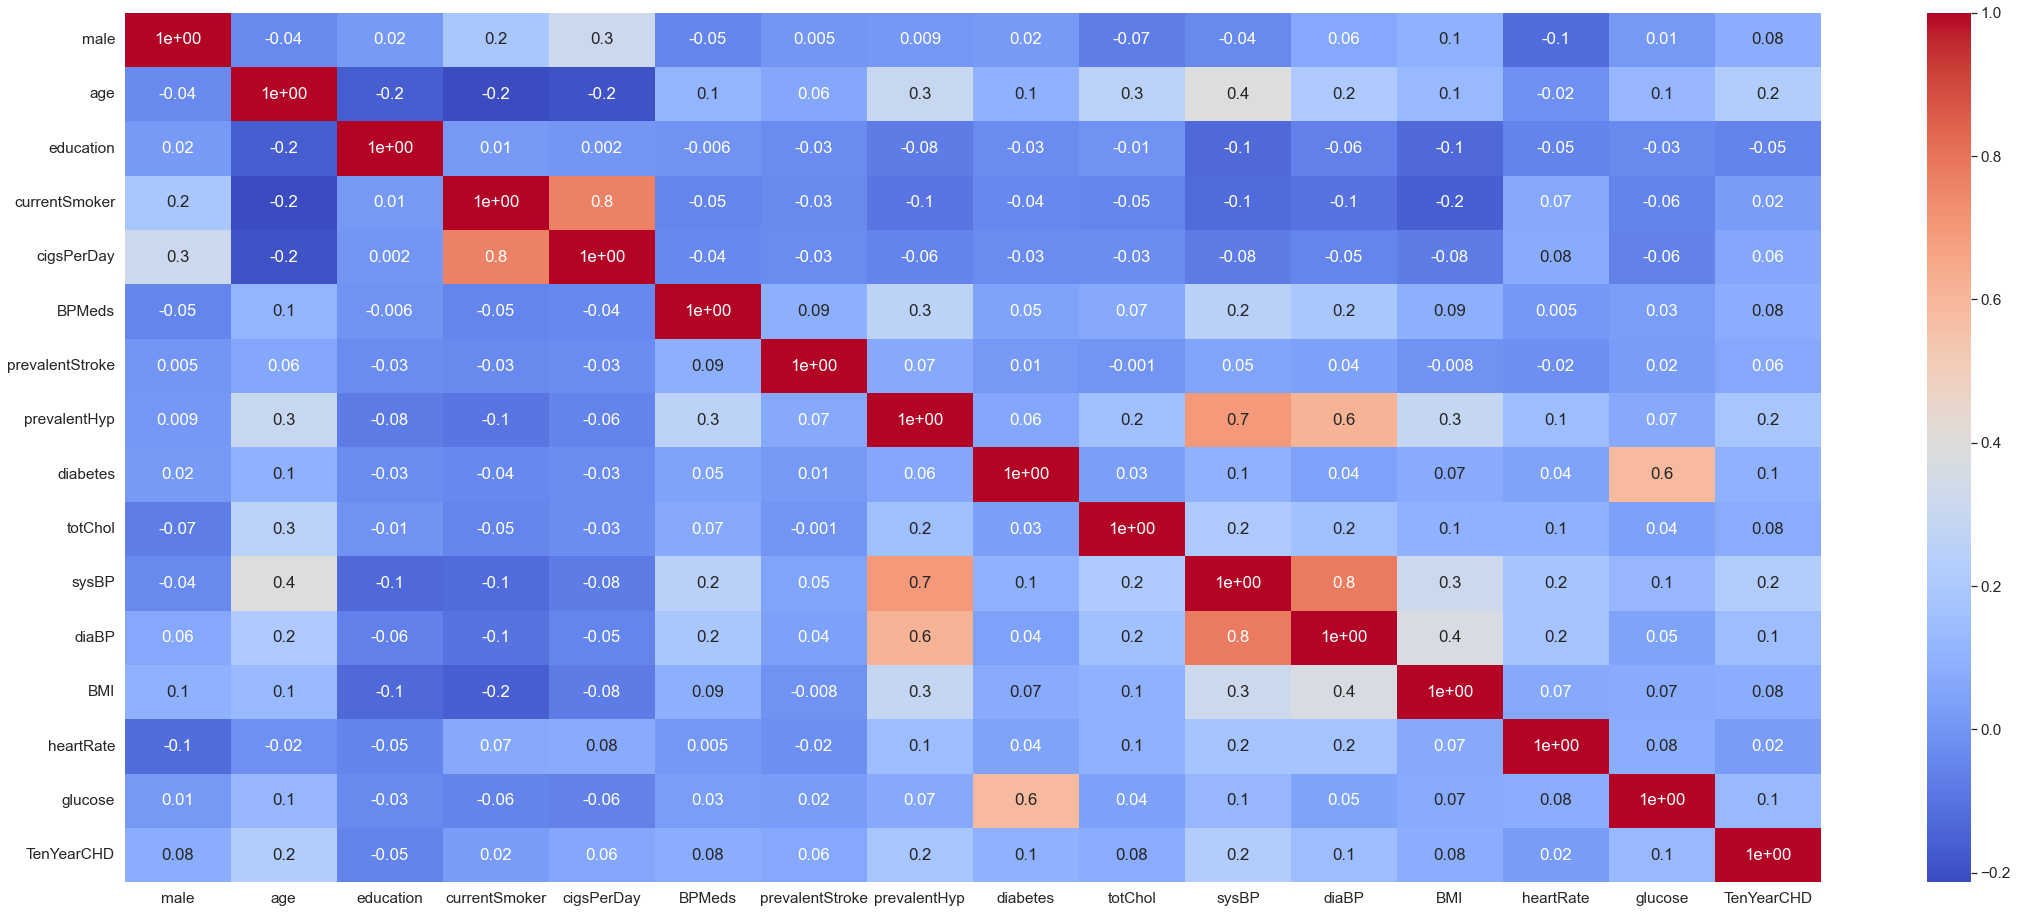

In [7]:
plt.rcParams['figure.figsize']=[38,16]
sns.set(font_scale=1.4)
corr = heart.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1')

## Adding Missing Value and scaling data

In [8]:
x1 = heart.drop("TenYearCHD", axis = 1)
y1 = heart["TenYearCHD"].copy()

In [9]:
my_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

x = my_pipeline.fit_transform(x1)
#x_te  = my_pipeline.fit_transform(X_test)
x_tr = pd.DataFrame(x, columns = x1.columns)
#x_test = x_te = pd.DataFrame(x_te, columns = x1.columns)
x_tr.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03
mean,1.308030e-17,3.733857e-16,1.193249e-16,2.538568e-16,-1.915725e-16,8.611293e-16,1.185857e-15,-5.021494e-16,-7.429259e-16,-2.014774e-16,-4.623040e-16,-2.807020e-16,-8.375578e-16,-2.955885e-16,7.282288e-17
std,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00
min,-8.594154e-01,-2.056101e+00,-9.709320e-01,-9.971178e-01,-7.555430e-01,-1.715912e-01,-7.619896e-02,-6.692894e-01,-1.572827e-01,-2.926106e+00,-2.225239e+00,-2.953247e+00,-2.533138e+00,-2.651683e+00,-1.963005e+00
25%,-8.594154e-01,-8.857399e-01,-9.709320e-01,-9.971178e-01,-7.555430e-01,-1.715912e-01,-7.619896e-02,-6.692894e-01,-1.572827e-01,-6.836898e-01,-6.963659e-01,-6.673244e-01,-6.708053e-01,-6.475553e-01,-4.429085e-01
50%,-8.594154e-01,-6.648730e-02,2.401875e-02,-9.971178e-01,-7.555430e-01,-1.715912e-01,-7.619896e-02,-6.692894e-01,-1.572827e-01,-6.392636e-02,-1.943478e-01,-7.467786e-02,-1.071721e-01,-6.301793e-02,-1.578905e-01
75%,1.163582e+00,7.527653e-01,1.018969e+00,1.002891e+00,9.376091e-01,-1.715912e-01,-7.619896e-02,1.494122e+00,-1.572827e-01,5.896423e-01,5.130415e-01,6.026324e-01,5.588277e-01,5.215194e-01,1.746306e-01
max,1.163582e+00,2.391270e+00,2.013920e+00,1.002891e+00,5.170489e+00,5.827804e+00,1.312354e+01,1.494122e+00,6.357980e+00,1.034810e+01,7.427201e+00,5.047481e+00,7.644326e+00,5.615345e+00,1.485306e+01


In [10]:
principal = PCA(n_components=9)
x2 = principal.fit_transform(x_tr)
x2.shape
x3 = pd.DataFrame(x2)
x3

,0,1,2,3,4,5,6,7,8
0,-1.827273,-0.981722,-0.055388,0.795652,-0.340267,-2.083310,-0.290662,1.004004,0.753652
1,-0.026513,-1.232729,-0.284782,-1.376791,-0.611360,-0.382199,0.666558,0.662033,1.132339
2,-0.984242,1.457529,-0.094067,0.380389,-0.393872,1.076618,0.134524,-0.128117,0.297591
3,1.465591,1.649088,0.328015,0.197942,0.428563,-0.250352,-0.902107,-0.221501,-1.190341
4,-0.816794,1.032145,0.146440,-1.784312,0.712035,-0.217138,-0.855576,0.465260,0.116975
...,...,...,...,...,...,...,...,...,...
3806,-0.902664,0.301698,0.529643,-1.888948,0.512687,2.241087,-2.361582,0.637818,2.073767
3807,-2.144499,-2.038213,-0.533306,0.184845,0.665343,-1.361443,-1.001465,0.226393,-0.041314
3808,1.627934,1.113533,-0.605197,0.890961,-0.664282,1.397966,-0.111170,-0.149606,-0.476685
3809,2.378105,-0.341979,4.208600,0.754680,-0.124867,-1.845312,-0.613361,0.504865,-0.608828


## Train-Test split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3,y1,test_size=0.35, random_state=0)


## Fitting into the Model

In [12]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train, y_train)
y_predict = model_lr.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict))
print('Accuracy score is:', accuracy_score(y_test, y_predict ))
print('Classification report is:\n', classification_report(y_test, y_predict))

Confusion Matrix:
 [[1151   13]
 [ 155   15]]
Accuracy score is: 0.8740629685157422
Classification report is:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1164
           1       0.54      0.09      0.15       170

    accuracy                           0.87      1334
   macro avg       0.71      0.54      0.54      1334
weighted avg       0.84      0.87      0.83      1334



## Hyperparameter Tuning

### RandomizedSearch Cv

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
logistic = LogisticRegression(solver='liblinear', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(x_train, y_train)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [15]:
search.best_estimator_

LogisticRegression(C=2.195254015709299, max_iter=200, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.01)

In [16]:
best_random_grid = search.best_estimator_

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = best_random_grid.predict(x_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy score is:', accuracy_score(y_test, y_pred ))
print('Classification report is:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[1151   13]
 [ 155   15]]
Accuracy score is: 0.8740629685157422
Classification report is:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1164
           1       0.54      0.09      0.15       170

    accuracy                           0.87      1334
   macro avg       0.71      0.54      0.54      1334
weighted avg       0.84      0.87      0.83      1334



### GridSearch CV

In [18]:
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[search.best_params_['C']],
    'penalty':['l2']
}
print(param_grid)

{'C': [2.195254015709299], 'penalty': ['l2']}


In [20]:
lr = LogisticRegression()
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 10, n_jobs = -1, verbose=2 )
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [2.195254015709299], 'penalty': ['l2']},
             verbose=2)

In [21]:
grid_search.best_estimator_

LogisticRegression(C=2.195254015709299)

In [22]:
best_grid = grid_search.best_estimator_

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred1 = best_random_grid.predict(x_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred1))
print('Accuracy score is:', accuracy_score(y_test, y_pred1 ))
print('Classification report is:\n', classification_report(y_test, y_pred1))

Confusion Matrix:
 [[1151   13]
 [ 155   15]]
Accuracy score is: 0.8740629685157422
Classification report is:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1164
           1       0.54      0.09      0.15       170

    accuracy                           0.87      1334
   macro avg       0.71      0.54      0.54      1334
weighted avg       0.84      0.87      0.83      1334



## ROC and AUROC

Prediction Probabilities

In [24]:
r_probs = [ 0 for _ in range(len(y_test))]
lr_probs = model_lr.predict_proba(x_test)

probablity for the positive outcome is kept

In [25]:
lr_probs = lr_probs[:,1]

Computing AUROC and ROC curve values

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

Calculate AUROC curve


In [27]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

Print AUROC scores

In [28]:
print("Random Prediction: AUROC = %.3f" % (r_auc))
print("Linear Regression: AUROC = %.3f" % (lr_auc))

Random Prediction: AUROC = 0.500
Linear Regression: AUROC = 0.729


Calculate ROC curve

In [29]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

Plot ROC Curve

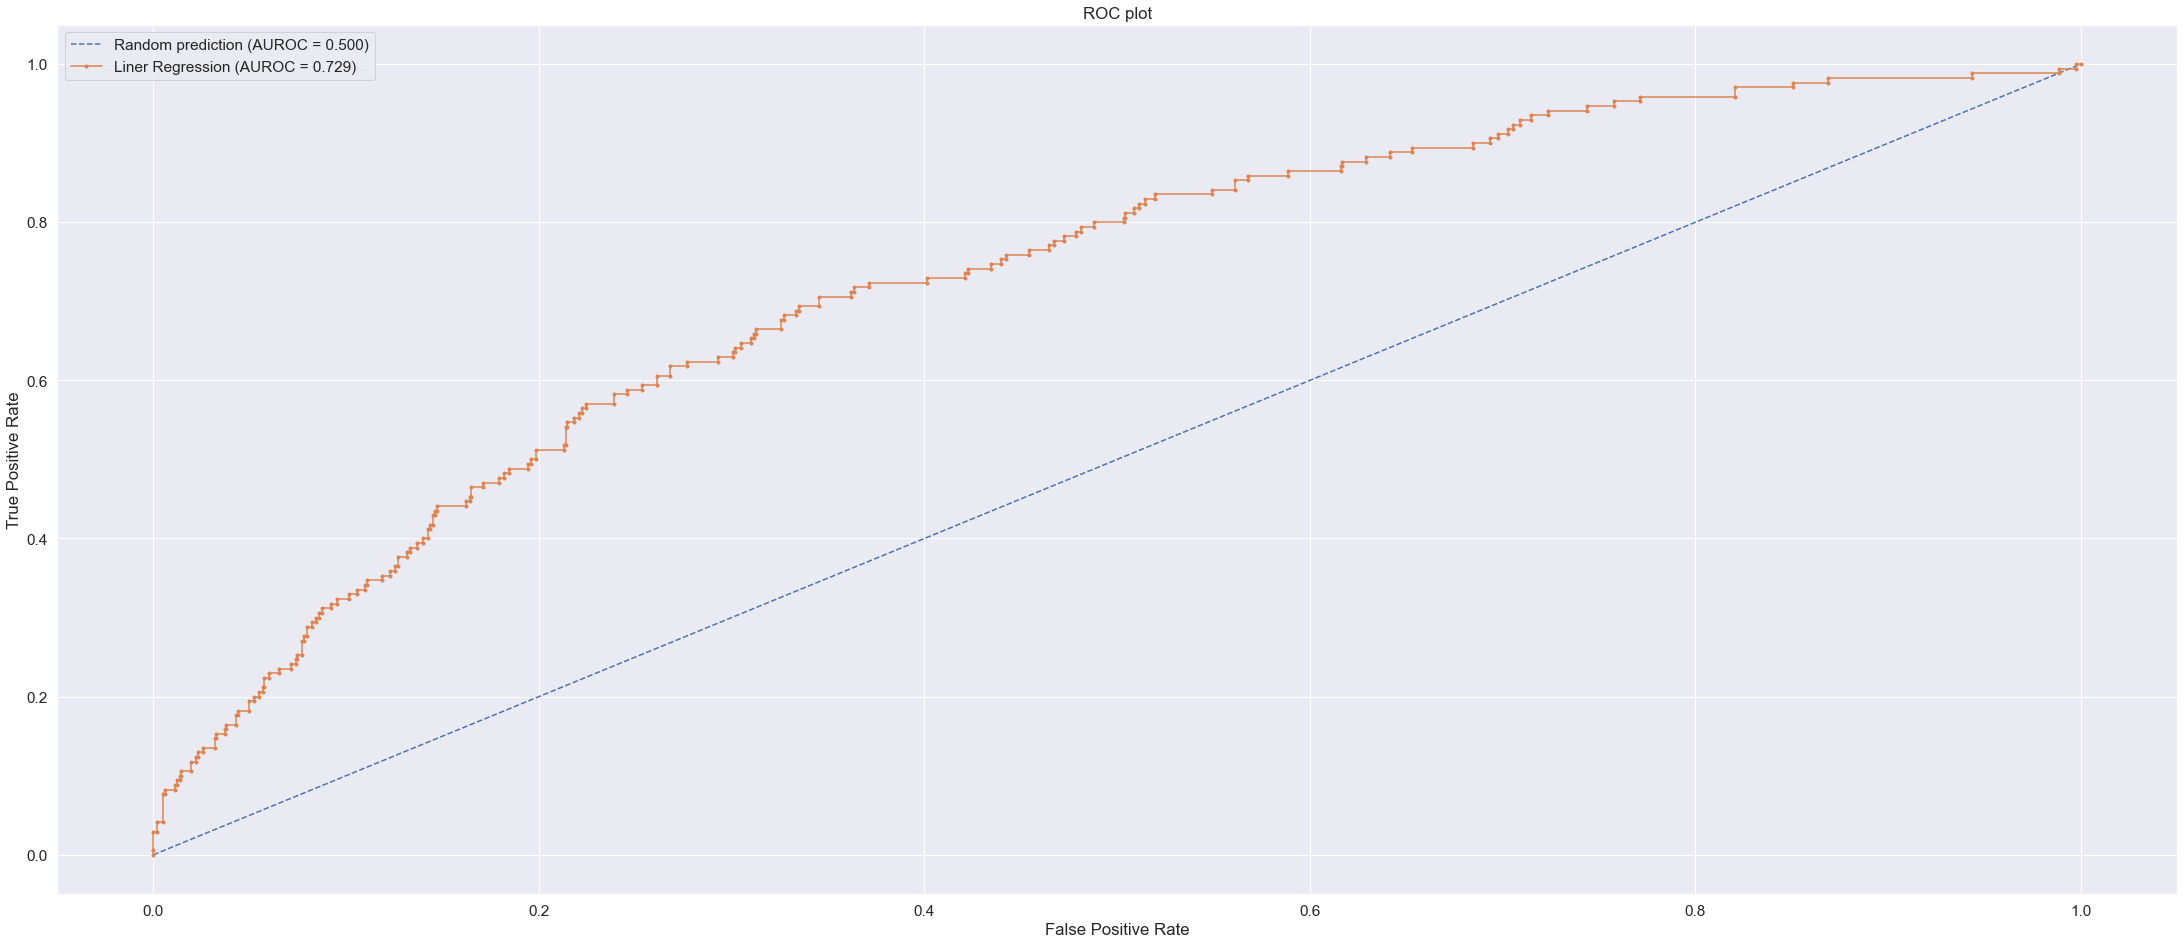

In [30]:
plt.plot(r_fpr, r_tpr, linestyle="--", label = "Random prediction (AUROC = %0.3f)"% r_auc)
plt.plot(lr_fpr, lr_tpr, marker=".", label = "Liner Regression (AUROC = %0.3f)" % lr_auc)

plt.title("ROC plot")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [31]:
import pickle

In [32]:
with open("y0103479_1_model.pkl", "wb") as file:
    pickle.dump(model_lr, file, pickle.HIGHEST_PROTOCOL)

In [33]:
with open("y0103479_1_model.pkl", "rb") as file:
    model_lr = pickle.load(file)